In [10]:
#install.packages('spatstat')
library('spatstat')
#install.packages('latex2exp')
library('latex2exp')

### Illustration of L-functions

In [2]:
li<-readRDS("./temp/sample-pp.RDS")
pp1<-li[[1]]
pp2<-li[[2]]
pp3<-li[[3]]

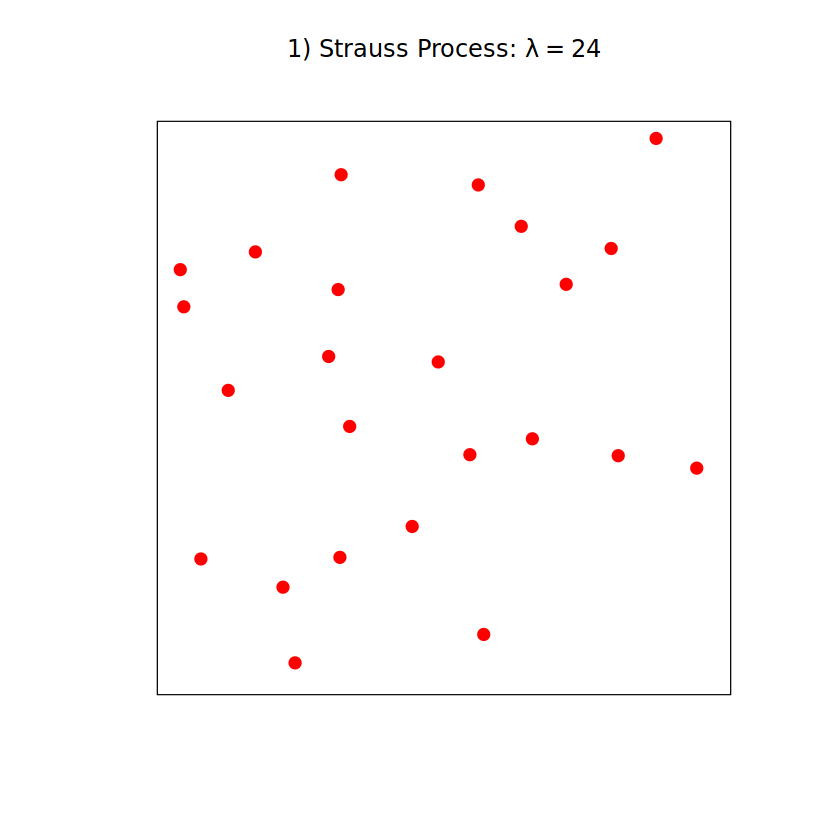

In [27]:
plot(pp1,main=TeX(r'(1) Strauss Process: $\lambda=24$)'),pch=20,cex=2,cols="red")

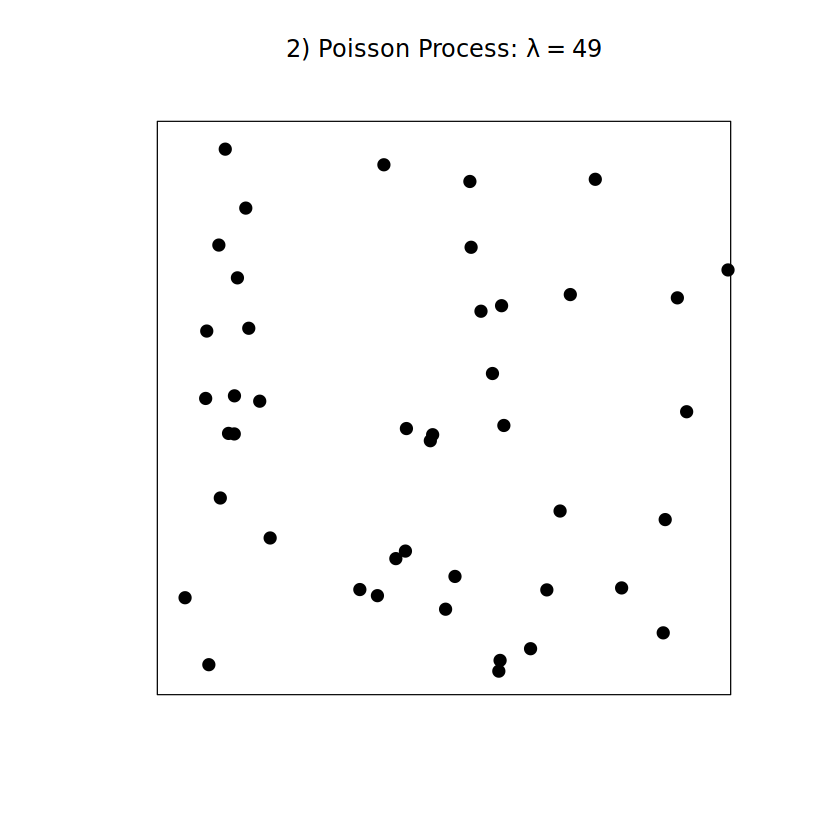

In [44]:
plot(pp2,main=TeX(r'(2) Poisson Process: $\lambda=49$)'),pch=20,cex=2)

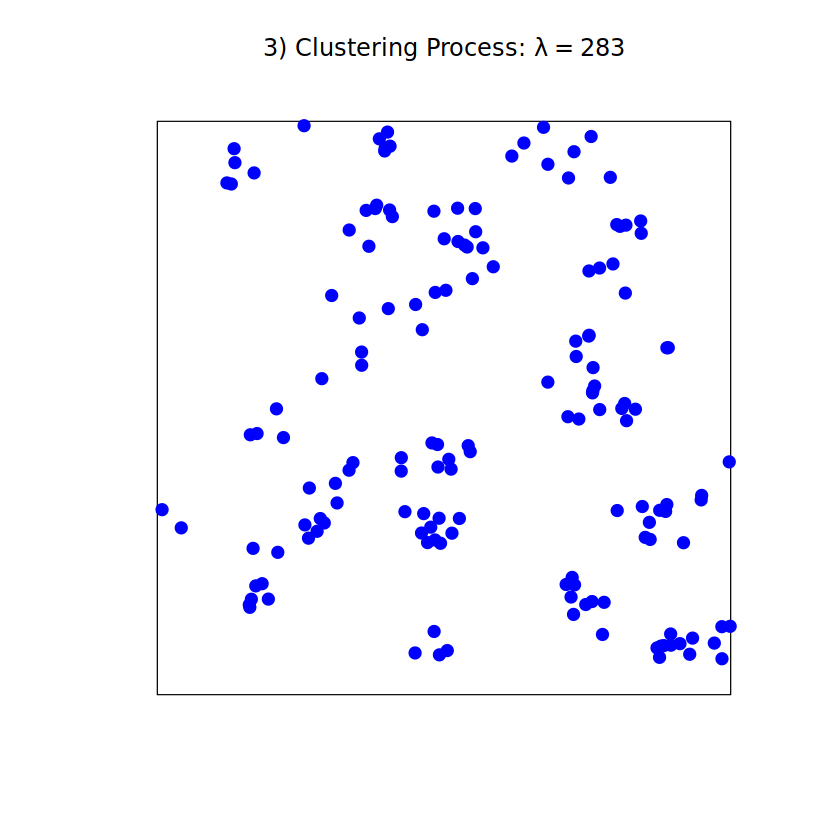

In [15]:
plot(pp3,main=TeX(r'(3) Clustering Process: $\lambda=283$)'),pch=20,cex=2,cols="blue")

In [18]:
radii = seq(0,0.25,0.001)
gp1<-Lest(pp1,r=radii, correction='best')
gp3<-Lest(pp3,r=radii, correction='best')

In [24]:
options(repr.plot.width=7, repr.plot.height=7)

In [22]:
text<-c(TeX(r'($L_{Poisson}(r)$)'),TeX(r'($L_{Strauss}(r)$)'),TeX(r'($L_{Matern}(r)$)'))

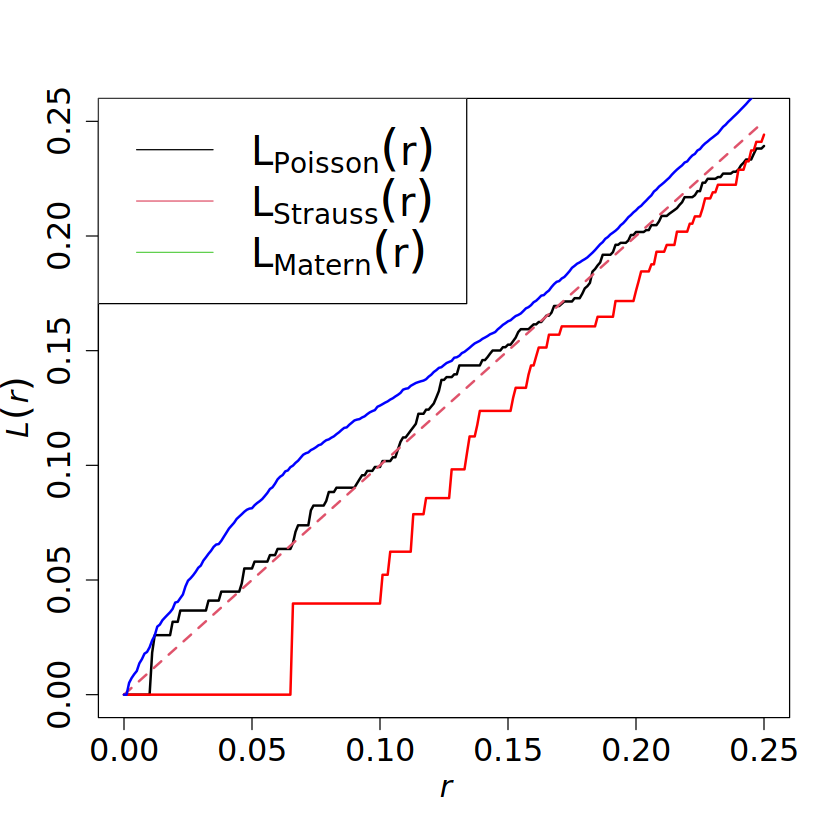

In [29]:
plot(Lest(pp2,r=radii,correction='best'),main='',legend='',lwd=2,cex.lab=1.5, cex.axis=1.6,mgp=c(2.5,1,0))
#axis(1,at = seq(0,0.25,0.05), labels=c(seq(0,0.2,0.05), "0.25"), cex.axis=1.5)
#title(mgp=c(2,1,0),cex.lab=1.2)
lines(radii, gp1$iso,col='red',lwd=2)
lines(radii, gp3$iso, col='blue',lwd=2)
op <- par(family = "arial")
legend(x = 'topleft',legend=text,
      col=c(1,2,3),lwd=1,cex=2)
#legend(x = 'topleft',legend=c(bquote(L[Poisson](r)), bquote(L[Strauss](r)),bquote(L[Matern](r))),
#      col=c(1,2,3),lwd=1,cex=1.5)
par(op)

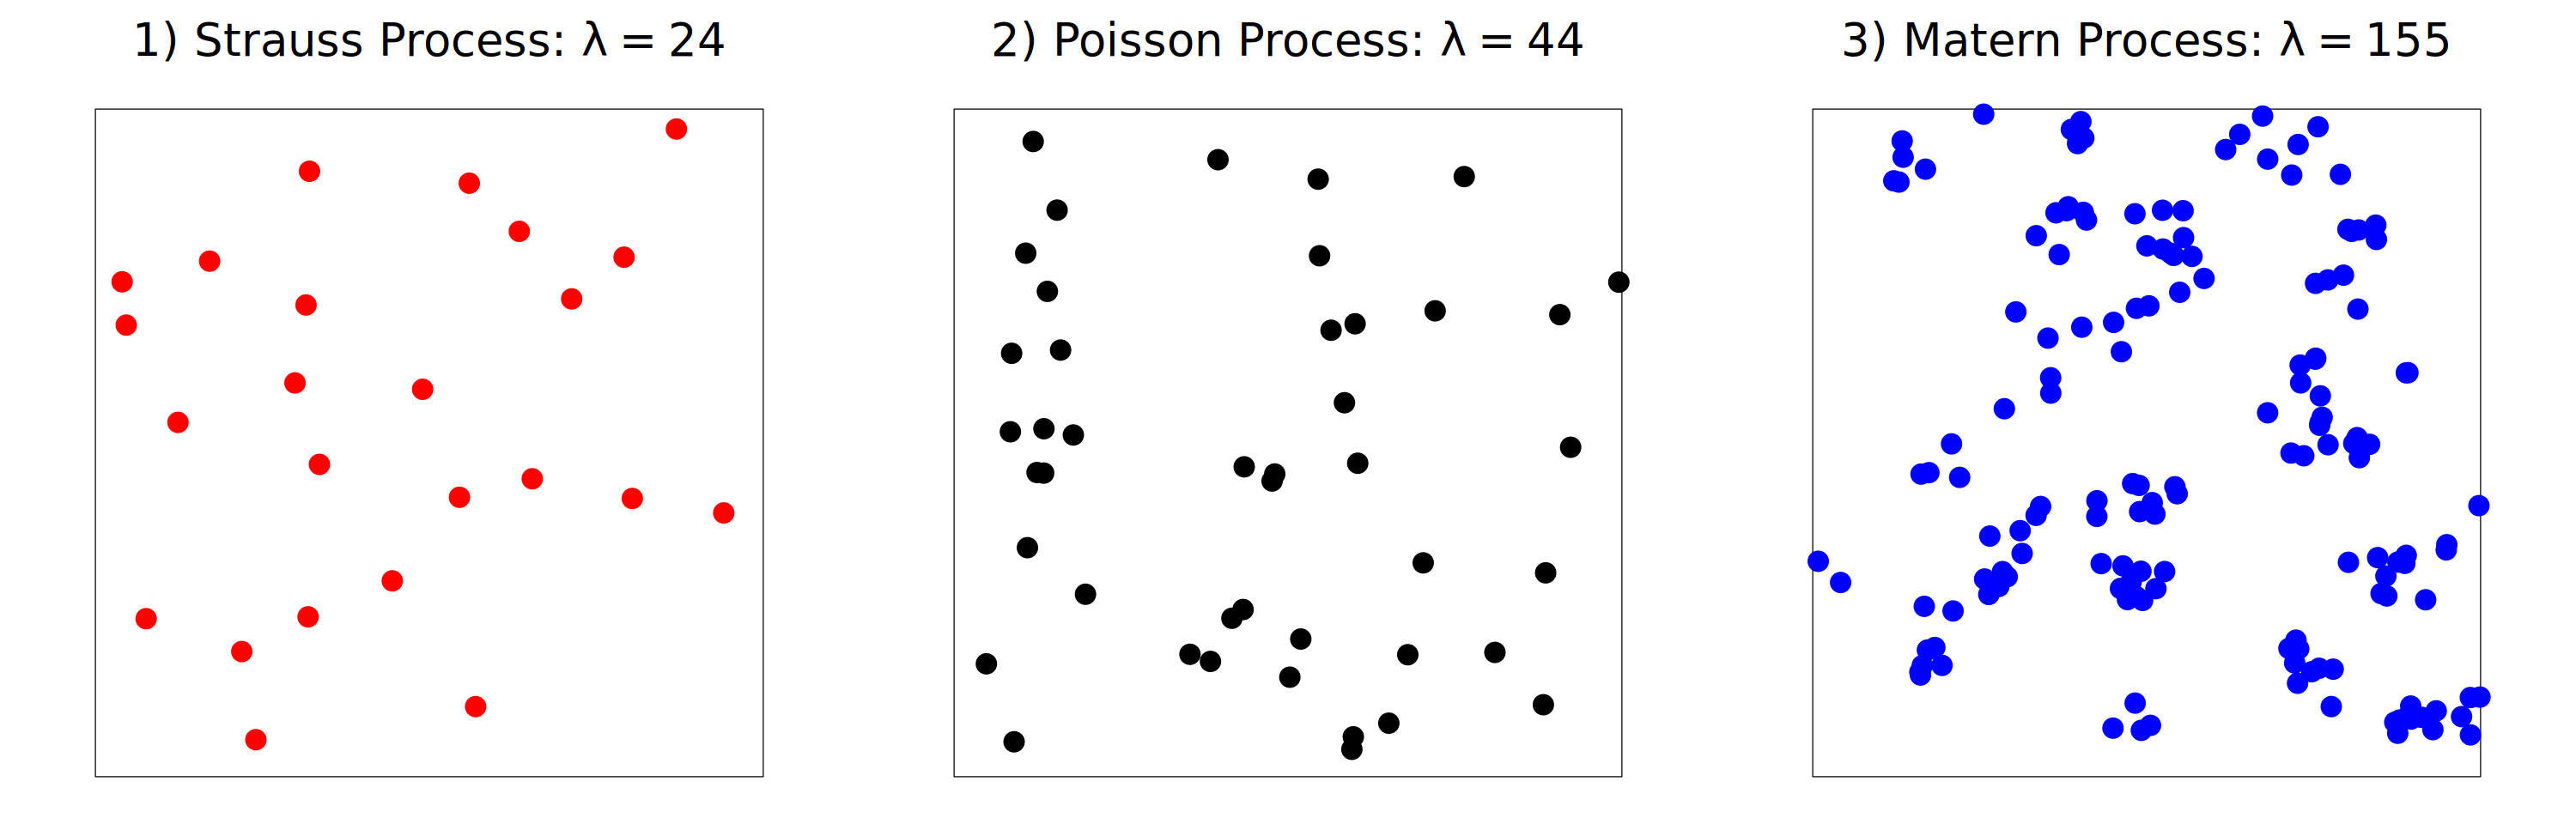

In [ ]:
options(repr.plot.width=25, repr.plot.height=8)
op <- par(family = "sans")
par(cex.main=4,mfrow=c(1,3),mai=c(0.2,0.2,0.8,0.2))
par(cex.main=4,mfrow=c(1,3),mai=c(0.2,0.2,0.8,0.2))
plot(pp1,main=TeX(r'(1) Strauss Process: $\lambda=24$)'),pch=20,cex=6,cols="red",cex.main=5)
plot(pp2,main=TeX(r'(2) Poisson Process: $\lambda=44$)'),pch=20,cex=6,cex.main=5)
plot(pp3,main=TeX(r'(3) Matern Process: $\lambda=155$)'),pch=20,cex=6,cols="blue",cex.main=5)
par(op)

### Hypothesis test framework

In [111]:
options(repr.plot.width=6, repr.plot.height=6)

In [8]:
# source("./scale.R")
test <- read.csv("/data/sag_data.csv")
options(warn=-1)

In [14]:
pp<-create_pp(test, NULL,c(24), '0741 Pvalb Gaba_3')

In [55]:
w = Window(pp[[1]])
np = npoints(pp[[1]])
pp.base<-rSSI(np, r=0.01, w, nsim=199)
E <- envelope(pp[[1]], Lest, simulate=pp.base,nsim=199)

Extracting 199 point patterns from list  ...
1, 2, 3, 4.6.8.10.12.14.16.18.20.22.24.26.28.30.32.34
.36.38.40.42.44.46.48.50.52.54.56.58.60.62.64.66.68.70.72.74
.76.78.80.82.84.86.88.90.92.94.96.98.100.102.104.106.108.110.112.114
.116.118.120.122.124.126.128.130.132.134.136.138.140.142.144.146.148.150.152.154
.156.158.160.162.164.166.168.170.172.174.176.178.180.182.184.186.188.190.192.194
.196.198
199.

Done.


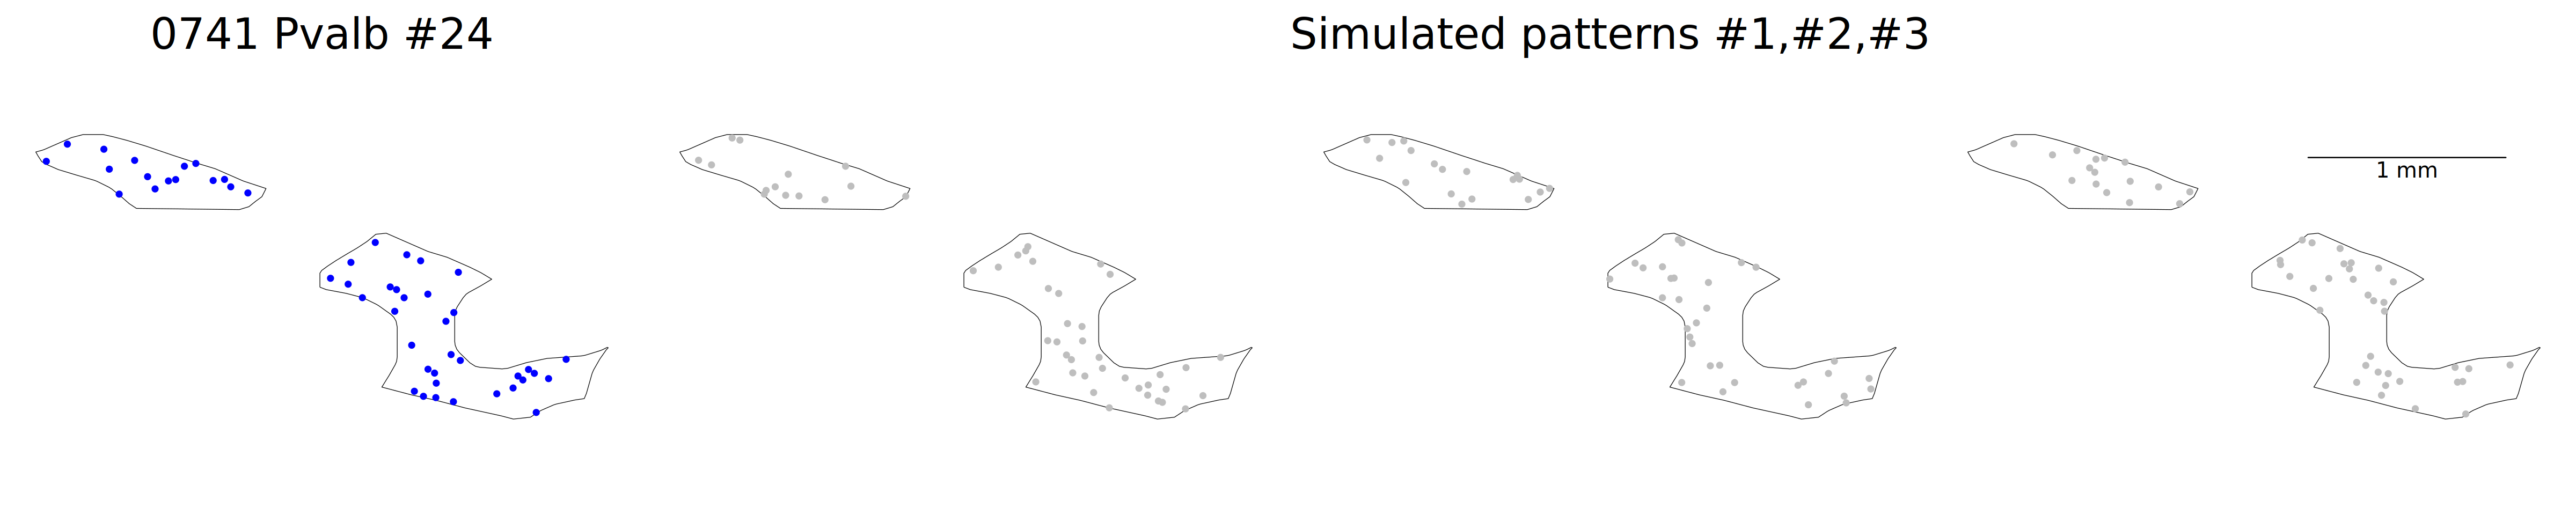

In [16]:
options(repr.plot.width=40, repr.plot.height=8)
par(cex.main=4,mai=c(0.2,0.2,0.8,0.2))
par(fig=c(0,0.25,0,1))
plot(unmark(pp[[1]]),main='',pch=20,cex=2,cols="blue")
mtext("0741 Pvalb #24",side=3,adj=0.5,cex=4)
par(fig=c(0.25,0.5,0,1),new=TRUE)
plot(pp.base[[1]],main='',pch=20,cex=2,cols="grey")
par(fig=c(0.5,0.75,0,1),new=TRUE)
plot(pp.base[[2]],main='',pch=20,cex=2,cols="grey")
mtext("Simulated patterns #1,#2,#3",side=3,adj=0.5,cex=4)
par(fig=c(0.75,1,0,1),new=TRUE)
plot(pp.base[[3]],main='',pch=20,cex=2,cols="grey")
lines(x=c(8,9), y=c(5,5),lty=1, lwd= 2)
text(x=8.5, y=5, pos=1, label="1 mm",cex=2)

In [56]:
pp1<-create_pp(test, NULL,c(24,23,22,21,20), '0109 L2/3 IT CTX Glut_2')

In [61]:
np<-npoints(pp1[[1]])
w<-Window(pp1[[1]])
pp1.base<-runifpoint(np, w, nsim=199)
E1 <- envelope(pp1[[1]], Lest,simulate=pp1.base,nsim=199)
saveRDS(list(E,E1),'env.RDS')

Extracting 199 point patterns from list  ...
1, 2, 
[19:14 remaining, estimate finish 2024-07-09 18:27:14]
3, 4
[19:32 remaining, estimate finish 2024-07-09 18:27:44]
.6
[19:49 remaining, estimate finish 2024-07-09 18:28:14]
.8
[19:29 remaining, estimate finish 2024-07-09 18:28:06]
.10
[19:18 remaining, estimate finish 2024-07-09 18:28:07]
.12
[19:04 remaining, estimate finish 2024-07-09 18:28:05]
.14
[18:47 remaining, estimate finish 2024-07-09 18:28:00]
.16
[18:33 remaining, estimate finish 2024-07-09 18:27:58]
.18
[18:21 remaining, estimate finish 2024-07-09 18:27:58]
.20
[18:10 remaining, estimate finish 2024-07-09 18:27:59]
.22
[17:59 remaining, estimate finish 2024-07-09 18:28:01]
.24
[17:46 remaining, estimate finish 2024-07-09 18:28:00]
.26
[17:33 remaining, estimate finish 2024-07-09 18:27:59]
.28
[17:21 remaining, estimate finish 2024-07-09 18:27:59]
.30
[17:09 remaining, estimate finish 2024-07-09 18:28:00]
.32
[16:55 remaining, estimate finish 2024-07-09 18:27:57]
.34
[16:4

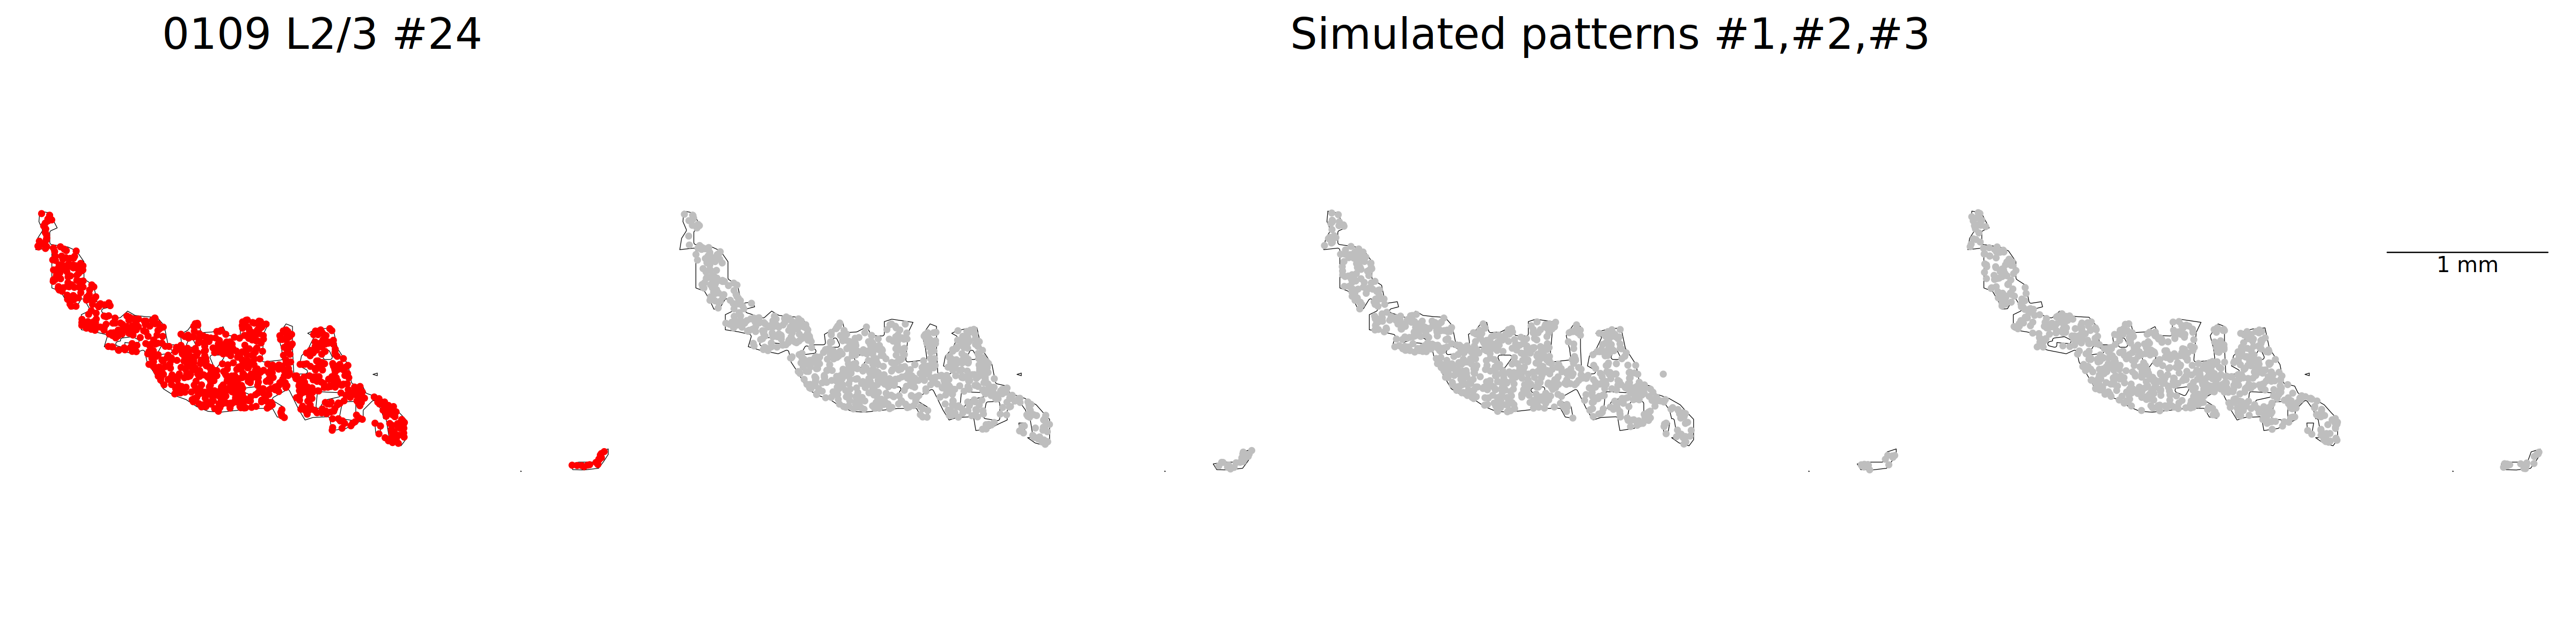

In [52]:
options(repr.plot.width=40, repr.plot.height=10)
par(cex.main=4,mai=c(0.2,0.2,0.8,0.2))
par(fig=c(0,0.25,0,1))
plot(unmark(pp[[1]]),main='',pch=20,cex=2,cols="red")
mtext("0109 L2/3 #24",side=3,adj=0.5,cex=4)
par(fig=c(0.25,0.5,0,1),new=TRUE)
plot(pp.base[[1]],main='',pch=20,cex=2,cols="grey")
par(fig=c(0.5,0.75,0,1),new=TRUE)
plot(pp.base[[2]],main='',pch=20,cex=2,cols="grey")
mtext("Simulated patterns #1,#2,#3",side=3,adj=0.5,cex=4)
par(fig=c(0.75,1,0,1),new=TRUE)
plot(pp.base[[3]],main='',pch=20,cex=2,cols="grey")
lines(x=c(8,9), y=c(4.5,4.5),lty=1, lwd= 2)
text(x=8.5, y=4.5, pos=1, label="1 mm",cex=2)

In [6]:
Eli<-readRDS("./temp/env.RDS")
E<-Eli[[1]]
E1<-Eli[[2]]

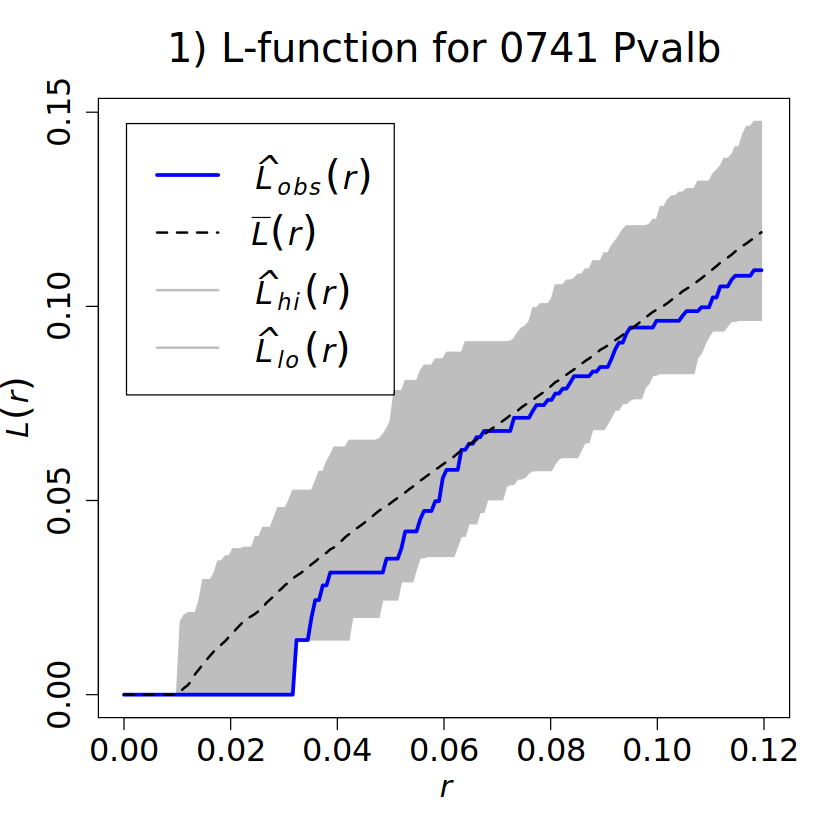

In [11]:
options(repr.plot.width=7, repr.plot.height=7)
#op <- par(family = "sans")
#par(cex.main=4,mfrow=c(1,2),mai=c(0.4,0.4,0.8,0.2))
plot(E,xlim=c(0,0.12),main=TeX(r'(1) $L$-function for 0741 Pvalb)'),col=c('blue','black',3,3),lwd=c(3,2,2,2),
     cex.lab=1.5, cex.axis=1.6,cex.main=2,mgp=c(2.5,1,0),legendargs=list(cex=1.6))

#axis(1,at = seq(0,0.2,0.05), labels=c(seq(0,0.15,0.05), "0.2mm"), cex.axis=1.2)

#plot(E1,xlim=c(0,0.05),main=TeX(r'(2) $L$-function for 0109 L2/3)'),lwd=2,cex.lab=1.5, cex.axis=1.2,cex.main=1.5)
#axis(1,at = seq(0,0.05,0.01), labels=c(seq(0,0.04,0.01), "0.05mm"), cex.axis=1.2)

#par(op)

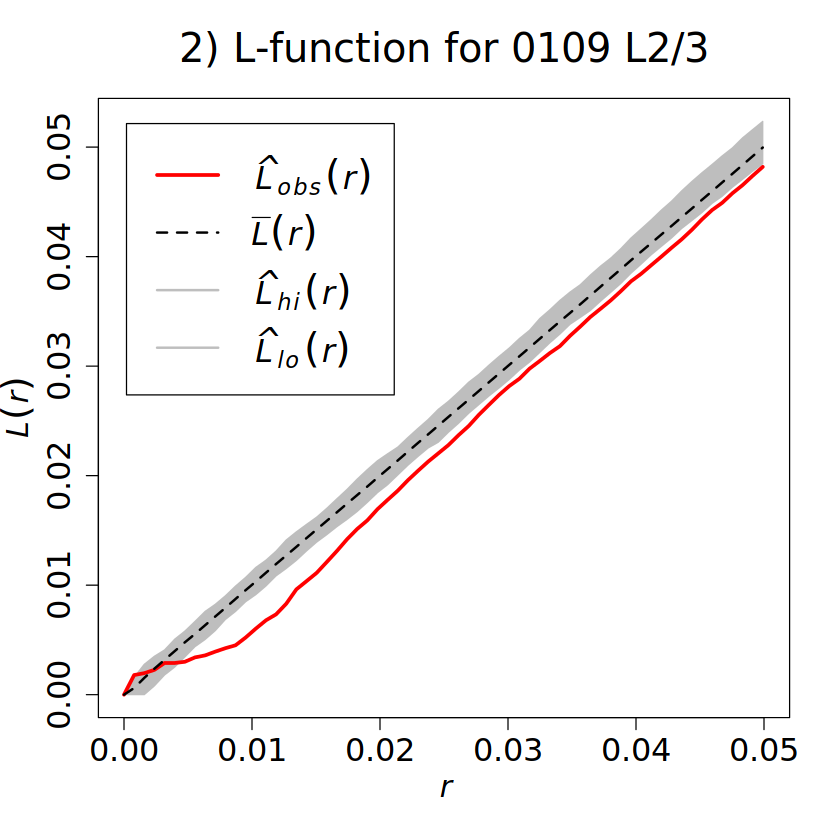

In [31]:
options(repr.plot.width=7, repr.plot.height=7)
#op <- par(family = "sans")
#par(cex.main=4,mfrow=c(1,2),mai=c(0.4,0.4,0.8,0.2))
#plot(E,xlim=c(0,0.2),main=TeX(r'(1) $L$-function for 0741 Pvalb)'),lwd=2,cex.lab=1.5, cex.axis=1.3,cex.main=1.5,mgp=c(2.5,1,0))
#axis(1,at = seq(0,0.2,0.05), labels=c(seq(0,0.15,0.05), "0.2mm"), cex.axis=1.2)

plot(E1,xlim=c(0,0.05),main=TeX(r'(2) $L$-function for 0109 L2/3)'),col=c('red','black',3,3),lwd=c(3,2,2,2),
     cex.lab=1.5, cex.axis=1.6,cex.main=2,mgp=c(2.5,1,0),legendargs=list(cex=1.6))
#axis(1,at = seq(0,0.05,0.01), labels=c(seq(0,0.04,0.01), "0.05mm"), cex.axis=1.2)

#par(op)